# Lab Vision Sytems: Session 1

## Organization
You can download the course materials from the course website

 - **Username**: CudaLabSS25
 - **Password**: SegmentAnything

# Today: 

### 1- Connecting and Working on Remote Machines
### 2- Pytorch Basics
### 3- Training and Optimization Tips
### 4- Training and Evaluating MLPs & CNNs
##### 4.1 Dataset and Data Loading
##### 4.2 Implementing, Training and Evaluating an MLP
##### 4.3 Implementing, Training and Evaluating an CNN

---

# 1. Connecting to a Remote Machine and Jupyter Basics

### Connecting to a Remote Machine

cuda3, cuda4, cuda6, cuda7, cuda9, cuda10, cuda11, cuda12

### Jupyter Cheatsheet

### Shortcuts

 - 'a': Add new cell
 - 'dd': Delete cell ('d' twice)
 - 'z': Undo last operation
 - 'c': Copy cell
 - 'v': Paste below
 - 'shift' + 'enter': Run current cell

In [3]:
!ls

data  imgs  models  Session1.ipynb


In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


### Debugging

In [5]:
def divide_numbers(n1, n2):
    """ Dividing two numbers :) """
    answer = n1 / n2
    return answer

divide_numbers(10, 2)

5.0

In [6]:
# Debug magic: %debug
var = divide_numbers(10, 0)

ZeroDivisionError: division by zero

In [7]:
%debug

> /var/folders/d_/jp708lf135b9l3ffk1y090dr0000gn/T/ipykernel_64601/1695316618.py(3)divide_numbers()
      1 def divide_numbers(n1, n2):
      2     """ Dividing two numbers :) """
----> 3     answer = n1 / n2
      4     return answer
      5 

*** NameError: name 'var' is not defined
*** Newest frame
> /var/folders/d_/jp708lf135b9l3ffk1y090dr0000gn/T/ipykernel_64601/917852807.py(2)<module>()
      1 # Debug magic: %debug
----> 2 var = divide_numbers(10, 0)

*** all frames above hidden, use `skip_hidden False` to get get into those.
*** all frames above hidden, use `skip_hidden False` to get get into those.
*** all frames above hidden, use `skip_hidden False` to get get into those.
*** all frames above hidden, use `skip_hidden False` to get get into those.


---

# 2- PyTorch Basics
 - https://pytorch.org/docs/stable/index.html
 - https://pytorch.org/vision/stable/index.html

In [1]:
import numpy as np
import torch
print(torch.__version__)

2.2.2


In [9]:
x = torch.Tensor(3, 4)
print(x)
print(x.shape)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([3, 4])


In [10]:
y = x.numpy()
x_rec = torch.from_numpy(y)
print(f"Error: {(x - x_rec).norm().item()}")

Error: 0.0


### Some Other Useful Basic Operations

#### View and Reshape

In [13]:
# randomly initializing feature maps
BATCH_SIZE = 4
SEQ_LENGTH = 8
NUM_CHANNELS = 3
HEIGHT = 8
WIDTH = 8

features = torch.randn(BATCH_SIZE, SEQ_LENGTH, NUM_CHANNELS, HEIGHT, WIDTH)
print(f"{features.shape = }")

features.shape = torch.Size([4, 8, 3, 8, 8])


In [23]:
torch.randint(10,(2,3))

tensor([[6, 1, 7],
        [0, 6, 5]])

In [37]:
4*3*64*8

6144

In [26]:
torch.rand((2,2))

tensor([[0.2083, 0.4530],
        [0.5819, 0.6420]])

In [25]:
torch.randn((2,2))

tensor([[ 2.9253, -1.0490],
        [ 1.8757,  0.5550]])

In [39]:
linear_features = features.view(BATCH_SIZE * SEQ_LENGTH, NUM_CHANNELS * HEIGHT * WIDTH)
print(f"{linear_features.shape = }")

linear_features.shape = torch.Size([32, 192])


In [40]:
linear_features_2 = features.view(BATCH_SIZE, -1, HEIGHT * WIDTH)
print(f"{linear_features_2.shape = }")

linear_features_2.shape = torch.Size([4, 24, 64])


In [41]:
recovered_features = linear_features_2.view(BATCH_SIZE, SEQ_LENGTH, NUM_CHANNELS, HEIGHT, WIDTH)
print(f"{recovered_features.shape = }")

print(f"\n Error: {(recovered_features - features).pow(2).mean()}")

recovered_features.shape = torch.Size([4, 8, 3, 8, 8])

 Error: 0.0


### Concatenating and Stacking

In [42]:
tensor_1 = torch.ones(1, 3)
tensor_2 = torch.zeros(1, 3)

In [50]:
stacked_tensor = torch.stack([tensor_1, tensor_2], dim=-1)
print(f"{stacked_tensor.shape = }")

stacked_tensor.shape = torch.Size([1, 3, 2])


In [68]:
stacked_tensor.squeeze(0).shape

torch.Size([3, 2])

In [64]:
t1 = torch.Tensor(2,4)
t2 = torch.Tensor(2,4)

stacked = torch.stack((t1, t2), dim=-1)
stacked.shape

torch.Size([2, 4, 2])

In [60]:
concat_tensor = torch.cat([tensor_1, tensor_2], dim=-1)
print(f"{concat_tensor.shape = }")

concat_tensor.shape = torch.Size([1, 6])


In [65]:
concat_tensor.unsqueeze(0).shape

torch.Size([1, 1, 6])

In [74]:
torch.permute(stacked,(1,0,2)).shape

torch.Size([4, 2, 2])

### Other useful operations:
 - Squeezing and Unsqueezing
 - Permuting and Transposing
 - ...


CUDA Tensors
------------

Tensors can be moved onto GPU using the ``.cuda`` function.

 - To run Jupyter or a Python scrip with CUDA, you need to preprend ``CUDA_VISIBLE_DEVICES=ID`` to the call
 - Connect to server with forwarding option
 ```bash 
 ssh -L localhost:9999:localhost:9999 villar@cuda6.informatik.uni-bonn.de
 ```
 - Start serving Jupyter Lab
 ```bash 
 CUDA_VISIBLE_DEVICES=0 jupyter lab --no-browser --port=9999
 ```
 
 

In [1]:
import torch

In [2]:
# Gives True if PyTorch has access to the GPU and CUDA
torch.cuda.is_available()

False

In [77]:
# number of available GPUs
torch.cuda.device_count()

0

In [23]:
x = torch.ones(2)
y = torch.ones(2)

In [24]:
print(x)
print(x.cuda())

tensor([1., 1.])
tensor([1., 1.], device='cuda:0')


In [25]:
x = x.cuda()

z = x + y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [26]:
y = y.cuda()
z = x + y
print(z)

tensor([2., 2.], device='cuda:0')


In [78]:
# the magic line
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [79]:
x, y = torch.ones(2), torch.ones(2)
x = x.to(device)
y = y.to(device)

z = x + y

---

In [29]:
!nvidia-smi

Wed Apr 16 10:28:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   41C    P8              5W /   40W |     906MiB /   4096MiB |     16%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Autograd: Automatic Differentiation
===================================

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that **your backprop is
defined by how your code is run**, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.


## Tensors and Gradients

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it.


In [3]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(f"'a' requires gradient?: {a.requires_grad}")

a.requires_grad = True
print(f"'a' requires gradient?: {a.requires_grad}")

'a' requires gradient?: False
'a' requires gradient?: True


#### By default in torch Tensors ```requires_grad = False```

In [4]:
tensor1 = torch.Tensor([[1., 2, 3], [4, 5, 6]])

print(tensor1)
print(f"{tensor1.requires_grad = }")
print(f"{tensor1.grad = }")

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor1.requires_grad = False
tensor1.grad = None


In [32]:
tensor1.requires_grad_()
# tensor1.requires_grad = True
print(tensor1)
print(f"{tensor1.requires_grad = }")
print(f"{tensor1.grad = }")

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)
tensor1.requires_grad = True
tensor1.grad = None


#### There’s one more class which is very important for autograd implementation - a ```Function```. ```Tensor``` and ```Function``` are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each tensor has a ```.grad_fn``` attribute that references a ```Function``` that has created the ```Tensor``` (except for Tensors created by the user - their ```grad_fn is None```)

In [3]:
a = torch.ones((2,2)).requires_grad_()
b = a ** 2
c = b.mean()
print(f"'a' grad function: {a.grad_fn}")
print(f"'b' grad function: {b.grad_fn}")
print(f"'c' grad function: {c.grad_fn}")

'a' grad function: None
'b' grad function: <PowBackward0 object at 0x10411d3f0>
'c' grad function: <MeanBackward0 object at 0x10411c4c0>


In [34]:
print(b)
print(c)

tensor([[1., 1.],
        [1., 1.]], grad_fn=<PowBackward0>)
tensor(1., grad_fn=<MeanBackward0>)


#### When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

In [35]:
# no backward pass, so grads are None
print(a.grad)

None


In [36]:
# but you can only access gradients of 'leaf tensors'
print(b.grad)

None


<ipython-input-36-68d6cbf2e84a>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(b.grad)


In [37]:
c.backward()
print(a.grad)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])


#### **Important** Future calls to backward will accumulate gradients into this vector

#### - $y = \frac{1}{4} \sum_{i=1}^{4} 2 \cdot x_i $
#### - $\frac{\partial y}{\partial x_i} = \frac{1}{2}$

In [40]:
x = torch.rand((2, 2)).requires_grad_()

for i in range(3):
    y = (2 * x).mean()
    y.backward()
    print(f"Gradients at iteration {i+1}:")
    print(f"{x.grad}\n")
    # x.grad.zero_()

Gradients at iteration 1:
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

Gradients at iteration 2:
tensor([[1., 1.],
        [1., 1.]])

Gradients at iteration 3:
tensor([[1.5000, 1.5000],
        [1.5000, 1.5000]])



### Enabling and Disabling Gradient Calculations 
You can also stops autograd from tracking history on newly created tensors with *requires_grad=True* by wrapping the code block in 
**with torch.no_grad()**

In [41]:
tensor1 = torch.Tensor([[1, 2, 3], 
                        [4, 5, 6]])
tensor1.requires_grad = True

In [42]:
with torch.no_grad():
    new_tensor = tensor1 * 3
    print('new_tensor = ', new_tensor)
    print('requires_grad for tensor1 = ', tensor1.requires_grad)
    print('requires_grad for new_tensor = ', new_tensor.requires_grad)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for new_tensor =  False


In [43]:
@torch.no_grad()
def mult_by_three(x):
    y = x * 3
    print('new_tensor = ', y)
    print('requires_grad for tensor1 = ', x.requires_grad)
    print('requires_grad for new_tensor = ', y.requires_grad)
mult_by_three(tensor1)

new_tensor =  tensor([[ 3.,  6.,  9.],
        [12., 15., 18.]])
requires_grad for tensor1 =  True
requires_grad for new_tensor =  False


---

# 3- Training and Optimization Tips

---

# 4- Training and Evaluating an MLP

## 4.1- The MNIST Dataset

Official webpage: http://yann.lecun.com/exdb/mnist/

The MNIST database contains 60,000 training images and 10,000 testing images. We can flatten this array into a vector of 28x28 = 784 numbers.

MNIST is a simple computer vision dataset. It consists of images of handwritten digits like these:

<img src="imgs/MNIST.png">

It also includes labels for each image, telling us which digit it is. For example, the labels for the above images are 5, 0, 4, and 1.

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw
Using downloaded and verified file: ./data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw
Using downloaded and verified file: ./data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw
Using downloaded and verified file: ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/home/villar/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### Which functions must a dataset have?

In [45]:
n_imgs_train = len(train_dataset)
n_imgs_test = len(test_dataset)

In [46]:
print(f"# Images Train: {n_imgs_train}")
print(f"# Images Test:  {n_imgs_test}")

# Images Train: 60000
# Images Test:  10000


In [47]:
img_shape = train_dataset[0][0].shape
label = train_dataset[0][1]

print(f"Image shape: {img_shape}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Label: 5


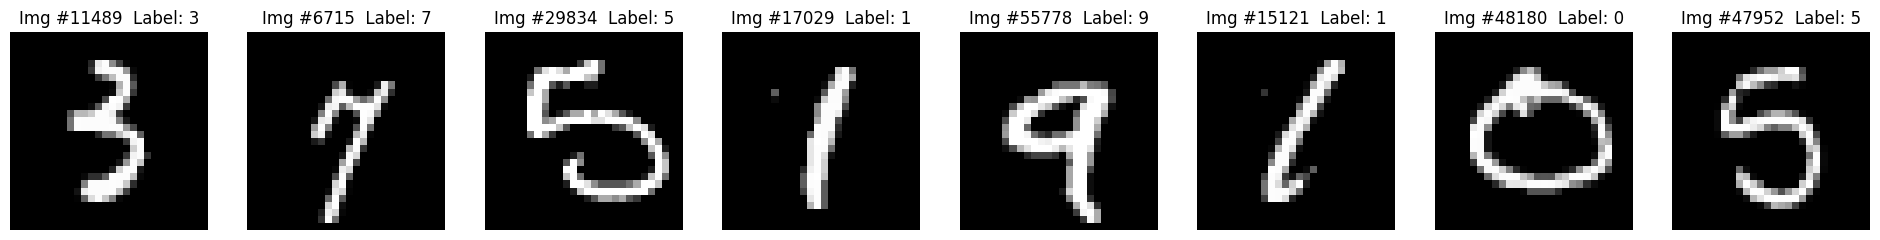

In [48]:
import matplotlib.pyplot as plt

N_IMGS = 8
fig, ax = plt.subplots(1,N_IMGS)
fig.set_size_inches(3 * N_IMGS, 3)

ids = np.random.randint(low=0, high=len(train_dataset), size=N_IMGS)

for i, n in enumerate(ids):
    img = train_dataset[n][0].numpy().reshape(28,28)
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(f"Img #{n}  Label: {train_dataset[n][1]}")
    ax[i].axis("off")
plt.show()

### Data Loaders

With our dataset object we can iterate over the Dataset by sampling images and their corresponding targets. <br>
However, this is somewhat cumbersone and does nto scale too well.<br>

In practice, we use Data Loaders, which provide an efficient way to iterate a Dataset object. 

 - https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

In [49]:
BATCH_SIZE = 1024
SHUFFLE_TRAIN = True

In [56]:
train_loader =  torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=SHUFFLE_TRAIN
    )

eval_loader =  torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False,
        drop_last=False
    )

In [57]:
imgs, labels = next(iter(eval_loader))
print(f"{imgs.shape = }")
print(f"{labels.shape = }")

imgs.shape = torch.Size([1024, 1, 28, 28])
labels.shape = torch.Size([1024])


In [58]:
for i, (imgs, labels) in enumerate(eval_loader):
    print(f"Iterating batch #{i+1}, which has {len(labels)} elements")
    if i > 10:
        break

Iterating batch #1, which has 1024 elements
Iterating batch #2, which has 1024 elements
Iterating batch #3, which has 1024 elements
Iterating batch #4, which has 1024 elements
Iterating batch #5, which has 1024 elements
Iterating batch #6, which has 1024 elements
Iterating batch #7, which has 1024 elements
Iterating batch #8, which has 1024 elements
Iterating batch #9, which has 1024 elements
Iterating batch #10, which has 784 elements


## 4.2 Fully Connected Networks and Multi-Layer Perceptron

Let's now implement our first neural networks. We will implement a fully connected network (or MLPs) for classification.

<img src="imgs/MLP.png" width="20%"> <span style="width: 300px"></span> <img src="imgs/softmax.png" width="48%'">

## 4.2.1 MLP Implementation

In [59]:
import torch.nn as nn

In [60]:
class Model(nn.Module):
    """
    MLP composed of two fully connected layers.
     - First layer takes pixel values and maps them to a hidden dimension
     - Nonlinear activation
     - Second layer maps from hidden dimension to number of classes, predicting a score for each of the classes
    """
    def __init__(self, input_dim=784, hidden_dim=128, output_dim=10):
        """ Model initalizer """
        super().__init__()
        self.layers = nn.Sequential(
                nn.Linear(in_features=input_dim, out_features=hidden_dim),
                nn.ReLU(),
                nn.Linear(in_features=hidden_dim, out_features=output_dim)
            )
        
    def forward(self, x):
        """ Forward pass through the model"""
        assert len(x.shape) == 2, f"ERROR! Shape of input must be 2D (b_size, dim)"
        pred = self.layers(x)
        return pred


def count_model_params(model):
    """ Counting the number of learnable parameters in a nn.Module """
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return num_params

In [61]:
model = Model(input_dim=784, hidden_dim=128, output_dim=10)
print(model)

Model(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [68]:
(784 * 128 + 128) + 128*10+10

101770

In [63]:
count_model_params(model)

101770

In [64]:
imgs, labels = next(iter(eval_loader))      # sampling images
flattened_imgs = imgs.flatten(start_dim=1)  # reshaping to desired size
output = model(flattened_imgs)              # forward pass through model

print(f"Imgs shape:         {imgs.shape}")
print(f"Model input shape:  {flattened_imgs.shape}")
print(f"Model output shape: {output.shape}")

Imgs shape:         torch.Size([1024, 1, 28, 28])
Model input shape:  torch.Size([1024, 784])
Model output shape: torch.Size([1024, 10])


## 4.2.2 Training the Model

In [65]:
from tqdm import tqdm

In [66]:
NUM_EPOCHS = 10
LR = 3e-4

In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model(input_dim=784, hidden_dim=128, output_dim=10)
model = model.to(device)

In [69]:
criterion = nn.CrossEntropyLoss()  # already includes a Softmax!
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [70]:
loss_list = []

for epoch in range(NUM_EPOCHS):
    progress_bar = tqdm(train_loader, total=len(train_loader))
    for i, (imgs, labels) in enumerate(progress_bar):
        # using GPU
        imgs, labels = imgs.to(device), labels.to(device)
    
        # forward pass
        flattened_imgs = imgs.flatten(start_dim=1)
        preds = model(flattened_imgs)
    
        # computing error
        loss = criterion(preds, labels)
        loss_list.append(loss.item())

        # removing accumulated gradients
        optimizer.zero_grad()
    
        # backprogating error to compute gradients
        loss.backward()
    
        # updating arameters
        optimizer.step()
    
        if(i % 10 == 0 or i == len(train_loader) - 1):
            progress_bar.set_description(f"Epoch {epoch + 1} Iter {i + 1}: loss {loss.item():.5f}. ")

Epoch 10 Iter 59: loss 0.26142. : 100%|██████████| 59/59 [00:06<00:00,  9.53it/s]


In [71]:
def smooth(f, K=5):
    """ Smoothing a function using a low-pass filter (mean) of size K """
    kernel = np.ones(K) / K
    f = np.concatenate([f[:int(K//2)], f, f[int(-K//2):]])  # to account for boundaries
    smooth_f = np.convolve(f, kernel, mode="same")
    smooth_f = smooth_f[K//2: -K//2]  # removing boundary-fixes
    return smooth_f

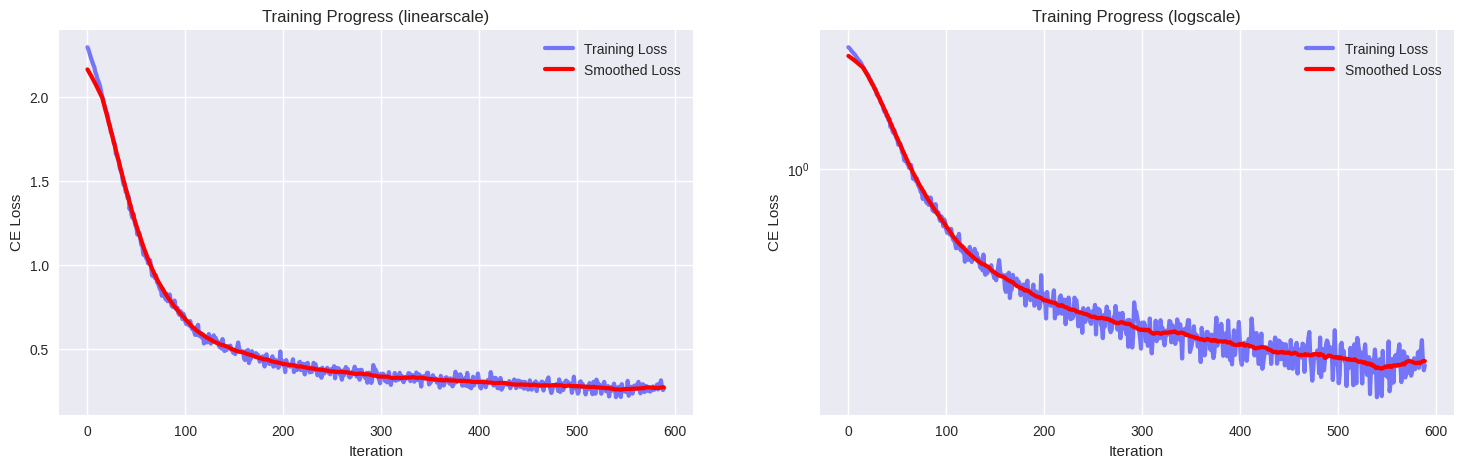

In [72]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,5)

smooth_loss = smooth(loss_list, 31)
ax[0].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress (linearscale)")

ax[1].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[1].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("CE Loss")
ax[1].set_yscale("log")
ax[1].set_title("Training Progress (logscale)")

plt.show()

## 4.2.3 Evaluating Trained MLP

In [73]:
n_correct = 0

with torch.no_grad():
    progress_bar = tqdm(enumerate(eval_loader), total=len(eval_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        flattened_imgs = imgs.flatten(start_dim=1)
        preds = model(flattened_imgs)
        
        pred_labels = torch.argmax(torch.softmax(preds, dim=-1), dim=-1)
        cur_correct = len(torch.where(pred_labels == labels)[0])
        n_correct = n_correct + cur_correct

accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(accuracy,2)}%")

100%|██████████| 10/10 [00:01<00:00,  9.26it/s]

Test accuracy: 92.9%


# 4.3 Convolutional Neural Networks

## 4.3.1 CNN Implementation

In [74]:
class CNN(nn.Module):
    """ 
    Varation of LeNet: a simple CNN model
    for handwritten digit recognition
    """
    def __init__(self):
        """ Model initializer """
        super().__init__()
        
        # layer 1
        # (1,28,28)
        conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        # (16, 24, 24)
        relu1 = nn.ReLU()
        maxpool1 = nn.MaxPool2d(kernel_size=2)
        # (16, 12, 12)
        self.layer1 = nn.Sequential(
                conv1, relu1, maxpool1
            )
      
        # layer 2
        # (16, 12, 12)
        conv2 = nn.Conv2d(in_channels=16, out_channels=32,  kernel_size=5, stride=1, padding=0)
        # (32, 8, 8)
        relu2 = nn.ReLU()
        maxpool2 = nn.MaxPool2d(kernel_size=2)
        # (32, 4, 4)
        self.layer2 = nn.Sequential(
                conv2, relu2, maxpool2
            )
        
        # fully connected classifier
        in_dim = 32 * 4 * 4
        self.fc = nn.Linear(in_features=in_dim, out_features=10)
        
        return
        
    def forward(self, x):
        """ Forward pass """
        cur_b_size = x.shape[0]
        out1 = self.layer1(x)
        out2 = self.layer2(out1) # (B, 32, 4 ,4 ) -> (B, 32 * 4 * 4)
        out2_flat = out2.view(cur_b_size, -1)
        y = self.fc(out2_flat)
        return y
    
def count_model_params(model):
    """ Counting the number of learnable parameters in a nn.Module """
    num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return num_params

In [75]:
cnn = CNN()
params = count_model_params(cnn)

In [77]:
cnn

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [83]:
16*5*5 + 16 + 16*32*5*5 + 32 + 512*10 + 10

18378

In [82]:
print(f"Num. Params: {params}")

Num. Params: 18378


## 4.3.2 CNN Training

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn = CNN()
cnn = cnn.to(device)

In [79]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(params=cnn.parameters(), lr=LR)

In [80]:
loss_list = []

for epoch in range(NUM_EPOCHS):
    progress_bar = tqdm(train_loader, total=len(train_loader))
    for i, (imgs, labels) in enumerate(progress_bar):
        # using GPU
        imgs, labels = imgs.to(device), labels.to(device)
    
        # forward pass
        preds = cnn(imgs)
    
        # computing error
        loss = criterion(preds, labels)
        loss_list.append(loss.item())

        # removing accumulated gradients
        optimizer.zero_grad()
    
        # backprogating error to compute gradients
        loss.backward()
    
        # updating arameters
        optimizer.step()
    
        if(i % 10 == 0 or i == len(train_loader) - 1):
            progress_bar.set_description(f"Epoch {epoch + 1} Iter {i + 1}: loss {loss.item():.5f}. ")

Epoch 10 Iter 59: loss 0.14093. : 100%|██████████| 59/59 [00:04<00:00, 14.50it/s]


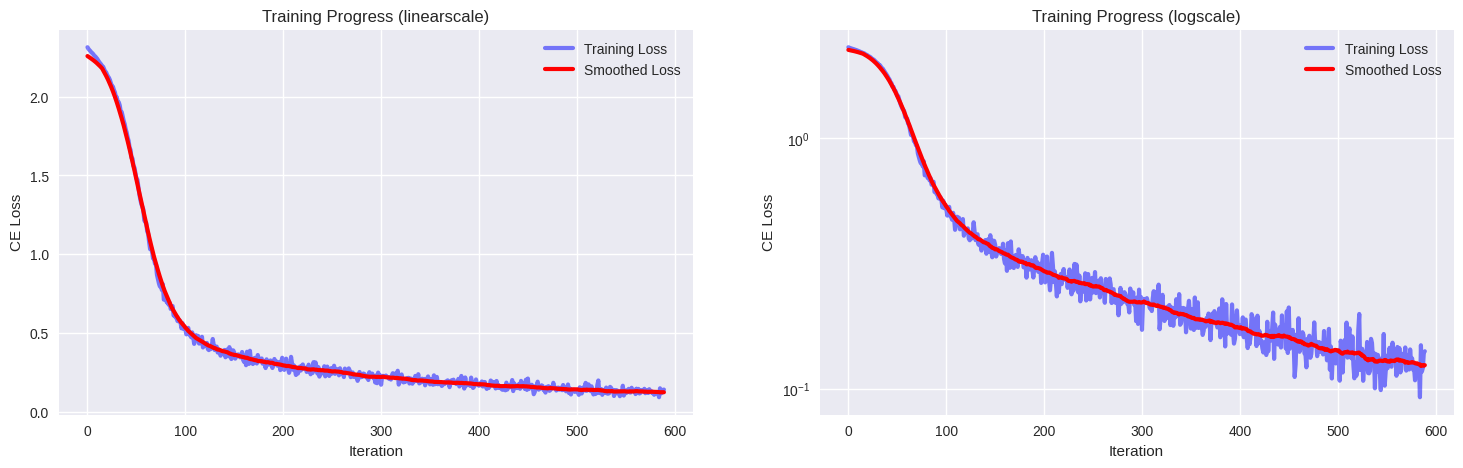

In [84]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18,5)

smooth_loss = smooth(loss_list, 31)
ax[0].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[0].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[0].legend(loc="best")
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("CE Loss")
ax[0].set_title("Training Progress (linearscale)")

ax[1].plot(loss_list, c="blue", label="Training Loss", linewidth=3, alpha=0.5)
ax[1].plot(smooth_loss, c="red", label="Smoothed Loss", linewidth=3)
ax[1].legend(loc="best")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("CE Loss")
ax[1].set_yscale("log")
ax[1].set_title("Training Progress (logscale)")

plt.show()

## 4.3.2 CNN Evaluation

In [85]:
n_correct = 0

with torch.no_grad():
    progress_bar = tqdm(enumerate(eval_loader), total=len(eval_loader))
    for i, (imgs, labels) in progress_bar: 
        #everything needs to be on the same device
        imgs = imgs.to(device)
        labels = labels.to(device)
        
        # forward pass
        preds = cnn(imgs)
        
        pred_labels = torch.argmax(torch.softmax(preds, dim=-1), dim=-1)
        cur_correct = len(torch.where(pred_labels == labels)[0])
        n_correct = n_correct + cur_correct

cnn_accuracy = n_correct / len(test_dataset) * 100
print(f"Test accuracy: {round(cnn_accuracy,2)}%")

100%|██████████| 10/10 [00:01<00:00,  8.73it/s]

Test accuracy: 96.87%


In [86]:
print(f"MLP Test Accuracy: {round(accuracy, 2)}%")
print(f"CNN Test Accuracy: {round(cnn_accuracy, 2)}%")

MLP Test Accuracy: 92.9%
CNN Test Accuracy: 96.87%


## Saving and Loading Model Checkpoints

In [87]:
import os

In [88]:
if(not os.path.exists("models")):
    os.makedirs("models")
savepath = f"models/checkpoint_epoch_{epoch}.pth"

torch.save({
    'epoch': epoch,
    'model_state_dict': cnn.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, savepath)

In [90]:
model = CNN()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

checkpoint = torch.load(savepath)

model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint["epoch"]

---

---

# Assignment 1

- Train and compare the following models on the CIFAR-10 dataset (available in PyTorch). The models should have slightly optimized parameters to try to maximize their performance.
  - MLP Classifier
  - Simple CNN
- Analyze your models:
  - Compare the performance of both models: investigate their learning curves (train/eval loss), compare their test accuracy, and compute their confusion matrix
  - Visualize some images, along with the predictions from your models. In what images do your models fail more often? Why do you think so?
- Mitigate Overfitting
  - Train both models with and without DropOut. Compare the results: training and validation loss, accuracy, ...
  - Implement and use **your own** custom learning rate warmup and learning rate scheduler criterion to avoid overfitting.<br>
    It is not allowed to use PyTorch's schedulers, but you should code your own.<br>
    Train **one model** using it and show whether you can mitigate overfitting.

<br>

- **Extra Point:**
  - Train and evaluated ONE of the following:
    - MLP-Mixer: https://openreview.net/pdf?id=EI2KOXKdnP
    - ConvMixer: https://arxiv.org/abs/2201.09792
  - Compare it with your MLP and CNN models
  - Does it work better? Why or why not?

#### **Deadline**: Tuesday 22.04 at 13:59

#### **Submission**:
  - Create a GitHub repository and give me access to it (my username is angelvillar96)
  - Push your assignment solution to GitHub no later than the deadline
  - Send me an email once your submission is ready.


#### **Note on Assignments**

 - Show your work and results in a Jupyter Notebook
 - In addition to results (plots, numbers, ...), **write a few sentences interpreting your results**. Why are the good or bad? What could make it work better?...
 - Feel free to add code to Python files (e.g. `visualizations.py`, `datasets.py`, ...). You can then reuse those files throughout assignments

#### **Note on Plagiarism**

 - Plagiarism (e.g. copying solutions from other groups) is not acceptable and will not be tolerated.
 - I will not accept AI-generated (e.g. ChatGPT) solutions for the assignments.
 - Adapting code from GitHub, StackOverflow, ... is allowed. However, you are required to refer to the original source in a comment:
 
 <img src="imgs/reference.png" width="50%">

#### **Next Session**: Wednesday 23.04 at 10:00 in room U1.105

---

# Groups

TODO

---

# Next Classes
 - **Session 2**: 23.04
 - **Session 3**: 07.05
 - **Session 4**: 21.05
 - **Session 5**: 04.06
 - **Session 6**: 18.06
 - **Session 7**: 02.07
 - **Session 8 + Project Begins:** 16.07
 - **Project Submission:** 30.09

## References:
 - https://pytorch.org/docs/stable/index.html
 - https://pytorch.org/docs/stable/autograd.html#
 - https://pytorch.org/docs/stable/nn.html
 - http://cs231n.stanford.edu/
 - http://neuralnetworksanddeeplearning.com/

<div class=alert style="background-color:#F5F5F5; border-color:#C8C8C8">
    <b>Angel Villar-Corrales</b><br>
    <ul>
       <li> <b>Email</b>: villar@ais.uni-bonn.de
       <li> <b>Website</b>: angelvillarcorrales.com
    </ul>
</div> 